## 서울시 CCTV 현황 데이터 분석
1. 서울통계서비스 사이트에서 '주민등록인구(구별)' 통계에서 2018년도 데이터를 다운 받아서 '서울시 인구현황.txt' 파일로 저장한다.

2. 파일에서 데이터를 읽어 컬럼이 '자치구', '인구수', '내국인', '외국인', '고령자' 인 데이터 프레임을 만든다.(pop)

3. 외국인 비율과 고령자 비율을 추가한다.

4. 서울시 자치구 년도별 CCTV 설치 현황 데이터를 다운 받아서
   '서울시 자치구 년도별 CCTV 설치 현황.xlsx' 파일로 저장한후, 데이터를 읽서 데이터 프레임을 만든다.(cctv)

5. '기관명' 컬럼 데이터의 빈칸을 없애고, 컬럼명을 '자치구'로 변경한다.

6. 2015년 이전의 데이터를 합하여 '2015년 이전' 컬럼을 만들고,
   최근 3개년간의 데이터를 합하여 '최근 3개년' 컬럼을 만든 후, '최근 증가율' 컬럼을 만든다.

7. '자치구', '소계', '최근 증가율' 컬럼을 제외하고 나머지는 모두 삭제한다.

8. 서울시 인구 데이터와 cctv 데이터를 합친다.

9. CCTV 현황을 다양한 형태로 시각화하여 보여준다.

In [1]:
# Matplotlib 사용과 한글 처리를 위한 Code
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math as math
from matplotlib import rc

# Matplotlib 한글처리 코드
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 14

mpl.rc('font', family='Malgun Gothic')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

pop = pd.read_csv('서울시 인구현황.txt' 
                  ,sep='\t' 
                  ,thousands = ','
                  ,skiprows = [0,1,2,3]
                  ,usecols=[1,3,6,9,13]
                  ,names = ['자치구','인구수','내국인','외국인','고령자']
                 )
pop

pop['외국인 비율'] = pop['외국인'] / pop['인구수'] * 100
pop['고령자 비율'] = pop['고령자'] / pop['인구수'] * 100

pop.head(5)

,자치구,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율
0,종로구,163026,153065,9961,26742,6.110068,16.403518
1,중구,135633,125725,9908,22005,7.305007,16.223928
2,용산구,245090,228999,16091,37640,6.565343,15.357624
3,성동구,316463,308221,8242,42767,2.604412,13.514060
4,광진구,371063,355559,15504,45619,4.178266,12.294139


In [3]:
cctv = pd.read_excel('서울시 자치구 년도별 CCTV 설치 현황.xlsx')
cctv.head(5)

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [4]:
cctv['기관명'] = [x.replace(' ','') for x in cctv['기관명'].unique()]

In [5]:
#데이터 가공
# a = cctv['기관명'].unique()
# # list(['강 남 구', '강 동 구', '강 북 구', '강 서 구', '관 악 구', '광 진 구', '구 로 구',
# #        '금 천 구', '노 원 구', '도 봉 구', '동대문구', '동 작 구', '마 포 구', '서대문구',
# #        '서 초 구', '성 동 구', '성 북 구', '송 파 구', '양 천 구', '영등포구', '용 산 구',
# #        '은 평 구', '종 로 구', '중     구', '중 랑 구'])
# b= []

# for i in a:
#     b.append(i.replace(' ',''))
    
# # print(b)

In [6]:
#노가다 방법
#cctv['기관명'].unique()
#cctv['기관명'] = b
#         ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구',
#        '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구',
#        '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구',
#        '은평구', '종로구', '중구', '중랑구']

In [7]:
cctv.rename(columns={'기관명':'자치구'}
            ,inplace=True
           )
cctv.head(5)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [8]:
cctv['2011년 이전'] = cctv['2011년 이전'].fillna(0).astype(int)
cctv['2012년'] = cctv['2012년'].fillna(0).astype(int)
cctv['2013년'] = cctv['2013년'].fillna(0).astype(int)

In [9]:
cctv.head(5)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944,195,316,430,546,765,577,448
1,강동구,1879,303,387,134,59,144,194,273,385
2,강북구,1265,243,88,141,74,145,254,1,319
3,강서구,1617,219,155,118,230,187,190,264,254
4,관악구,3985,430,56,419,487,609,619,694,671


In [10]:
cctv.head(5)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944,195,316,430,546,765,577,448
1,강동구,1879,303,387,134,59,144,194,273,385
2,강북구,1265,243,88,141,74,145,254,1,319
3,강서구,1617,219,155,118,230,187,190,264,254
4,관악구,3985,430,56,419,487,609,619,694,671


In [11]:
cctv['2015년 이전'] = cctv[['2011년 이전','2012년','2013년','2014년','2015년']].sum(axis = 1)
cctv

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2015년 이전
0,강남구,5221,1944,195,316,430,546,765,577,448,3431
1,강동구,1879,303,387,134,59,144,194,273,385,1027
2,강북구,1265,243,88,141,74,145,254,1,319,691
3,강서구,1617,219,155,118,230,187,190,264,254,909
4,관악구,3985,430,56,419,487,609,619,694,671,2001
5,광진구,1581,470,42,83,87,64,21,468,346,746
6,구로구,3227,852,219,349,187,268,326,540,486,1875
7,금천구,1634,27,17,242,101,382,136,199,530,769
8,노원구,1906,481,117,203,80,461,298,110,156,1342
9,도봉구,858,197,66,8,185,59,155,117,71,515


In [12]:
# cctv['xxx']= cctv.iloc[:,2:7].sum(axis = 1)
#cctv

6. 2015년 이전의 데이터를 합하여 '2015년 이전' 컬럼을 만들고,
   최근 3개년간의 데이터를 합하여 '최근 3개년' 컬럼을 만든 후, '최근 증가율' 컬럼을 만든다.
    

In [13]:
cctv['최근 3개년'] = cctv[['2016년','2017년','2018년']].sum(axis = 1)
cctv

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2015년 이전,최근 3개년
0,강남구,5221,1944,195,316,430,546,765,577,448,3431,1790
1,강동구,1879,303,387,134,59,144,194,273,385,1027,852
2,강북구,1265,243,88,141,74,145,254,1,319,691,574
3,강서구,1617,219,155,118,230,187,190,264,254,909,708
4,관악구,3985,430,56,419,487,609,619,694,671,2001,1984
5,광진구,1581,470,42,83,87,64,21,468,346,746,835
6,구로구,3227,852,219,349,187,268,326,540,486,1875,1352
7,금천구,1634,27,17,242,101,382,136,199,530,769,865
8,노원구,1906,481,117,203,80,461,298,110,156,1342,564
9,도봉구,858,197,66,8,185,59,155,117,71,515,343


In [14]:
cctv['최근 증가율'] = round(cctv['최근 3개년'] / cctv['2015년 이전'] * 100 , 2)
cctv

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2015년 이전,최근 3개년,최근 증가율
0,강남구,5221,1944,195,316,430,546,765,577,448,3431,1790,52.17
1,강동구,1879,303,387,134,59,144,194,273,385,1027,852,82.96
2,강북구,1265,243,88,141,74,145,254,1,319,691,574,83.07
3,강서구,1617,219,155,118,230,187,190,264,254,909,708,77.89
4,관악구,3985,430,56,419,487,609,619,694,671,2001,1984,99.15
5,광진구,1581,470,42,83,87,64,21,468,346,746,835,111.93
6,구로구,3227,852,219,349,187,268,326,540,486,1875,1352,72.11
7,금천구,1634,27,17,242,101,382,136,199,530,769,865,112.48
8,노원구,1906,481,117,203,80,461,298,110,156,1342,564,42.03
9,도봉구,858,197,66,8,185,59,155,117,71,515,343,66.60


In [15]:
cctv.drop(['2011년 이전','2012년','2013년','2014년','2015년'], axis = 1, inplace = True)

In [16]:
cctv

,자치구,소계,2016년,2017년,2018년,2015년 이전,최근 3개년,최근 증가율
0,강남구,5221,765,577,448,3431,1790,52.17
1,강동구,1879,194,273,385,1027,852,82.96
2,강북구,1265,254,1,319,691,574,83.07
3,강서구,1617,190,264,254,909,708,77.89
4,관악구,3985,619,694,671,2001,1984,99.15
5,광진구,1581,21,468,346,746,835,111.93
6,구로구,3227,326,540,486,1875,1352,72.11
7,금천구,1634,136,199,530,769,865,112.48
8,노원구,1906,298,110,156,1342,564,42.03
9,도봉구,858,155,117,71,515,343,66.60


In [17]:
del cctv['2016년']
del cctv['2017년']
del cctv['2018년']
del cctv['2015년 이전']

In [18]:
pop.head(5)

,자치구,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율
0,종로구,163026,153065,9961,26742,6.110068,16.403518
1,중구,135633,125725,9908,22005,7.305007,16.223928
2,용산구,245090,228999,16091,37640,6.565343,15.357624
3,성동구,316463,308221,8242,42767,2.604412,13.514060
4,광진구,371063,355559,15504,45619,4.178266,12.294139


In [19]:
cctv.head(5)

,자치구,소계,최근 3개년,최근 증가율
0,강남구,5221,1790,52.17
1,강동구,1879,852,82.96
2,강북구,1265,574,83.07
3,강서구,1617,708,77.89
4,관악구,3985,1984,99.15


In [20]:
df = pd.merge(cctv, pop, on = '자치구')
df.head(5)

,자치구,소계,최근 3개년,최근 증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,5221,1790,52.17,547453,542364,5089,67085,0.929578,12.254020
1,강동구,1879,852,82.96,431920,427573,4347,58770,1.006436,13.606686
2,강북구,1265,574,83.07,322915,319164,3751,58196,1.161606,18.022080
3,강서구,1617,708,77.89,603611,596949,6662,79660,1.103691,13.197241
4,관악구,3985,1984,99.15,520040,501957,18083,72249,3.477233,13.892970


In [21]:
df['인당 CCTV'] = df['인구수'] / df['소계']

9. CCTV 현황을 다양한 형태로 시각화하여 보여준다.

#### - 자치구별 CCTV 댓수

In [22]:
df1 = df[['자치구','소계']]

In [23]:
df1.reset_index(drop=True)

df1 = df1.set_index('자치구')
#df1

In [24]:
df1 = df1.sort_values(by = '소계')

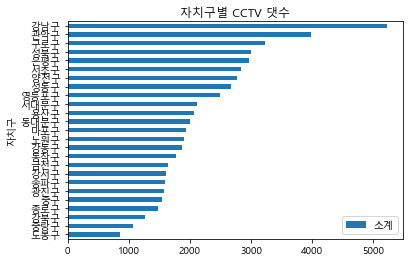

In [25]:
df1.plot.barh()
plt.title("자치구별 CCTV 댓수")
plt.rcParams["figure.figsize"] = (30,20)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

plt.show()

#### - 자치구별 최근 증가율 (내림차순으로)

####  -인구수와 CCTV 댓수의 산점도

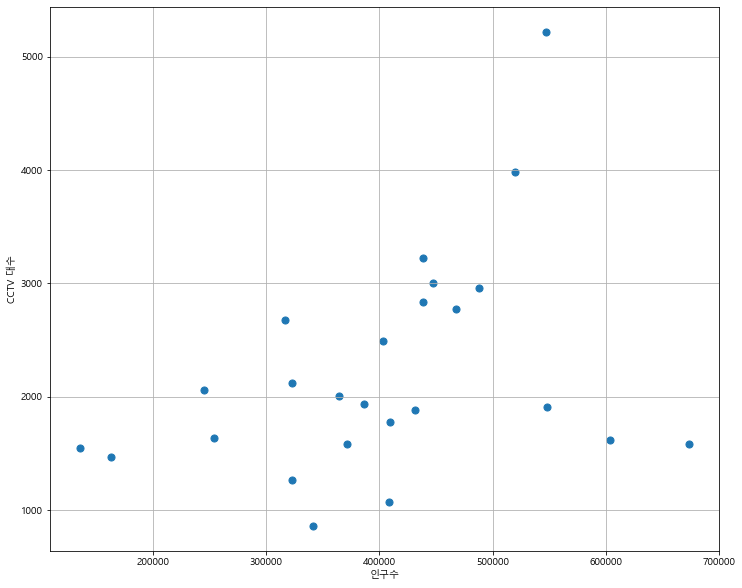

In [28]:
plt.figure(figsize = (12,10))
plt.scatter(df['인구수'], df['소계'], s = 50)
plt.xlabel('인구수')
plt.ylabel('CCTV 대수')
#plt.grid()
plt.show()

####  -인구수와 CCTV 댓수의 산점도 및 회귀선

In [30]:
fp1 = np.polyfit(df['인구수'], df['소계'], 1)
fp1

array([2.85240371e-03, 1.07309855e+03])

In [31]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000 , 700000, 101)

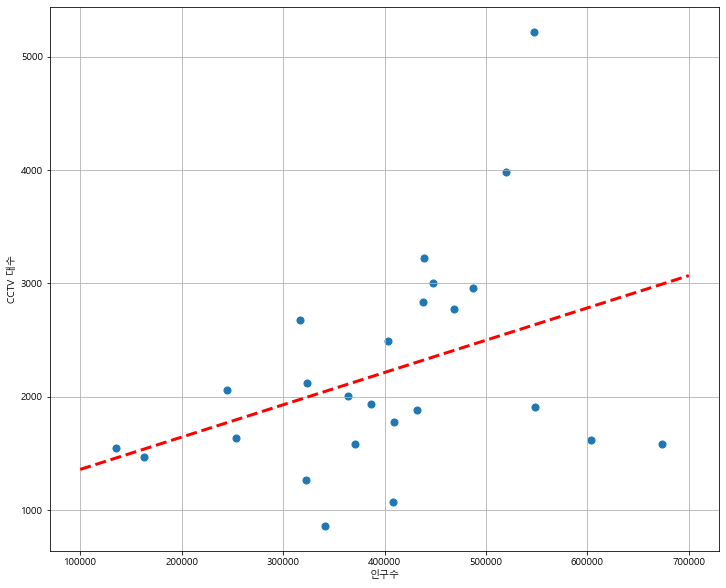

In [33]:
plt.figure(figsize = (12,10))
plt.scatter(df['인구수'], df['소계'], s = 50)
plt.plot(fx,f1(fx), ls= 'dashed' ,lw = 3, color = 'red')
plt.xlabel('인구수')
plt.ylabel('CCTV 대수')
#plt.grid()
plt.show()

####  -인구수와 CCTV 댓수의 산점도, 회귀선 및 자치구명


In [ ]:
df.head()

In [ ]:
df['오차'] = np.abs(df['소계'] - f1(df['인구수']))
df

In [ ]:
df_sort = df.sort_values(by = '오차', ascending= False)
df_sort.head(10)

In [ ]:
plt.figure(figsize = (14,10))
plt.scatter(df['인구수'], df['소계'], c=df['오차'], s = 50)
plt.plot(fx,f1(fx), ls= 'dashed' ,lw = 3, color = 'g')

for n in range(10):
    plt.text(df_sort['인구수'][n] * 1.02, df_sort['소계'][n] * 0.98
             ,df_sort.index[n], fontsize = 15)

plt.xlabel('인구수')
plt.ylabel('인구당 비율')
plt.colorbar()             
#plt.grid()
plt.show()

In [ ]:
#고령자 비율(인당 CCTV 비율), 외국인 비율(인당 CCTV 비율) 구하기

In [ ]:
plt.figure(figsize = (14,10))
plt.scatter(df['고령자 비율'], df['소계'], c=df['오차'], s = 50)
plt.plot(fx,f1(fx), ls= 'dashed' ,lw = 3, color = 'g')

for n in range(10):
    plt.text(df_sort['고령자 비율'][n] * 1.02, df_sort['소계'][n] * 0.98
             ,df_sort.index[n], fontsize = 15)

plt.xlabel('고령자 비율')
plt.ylabel('인구당 비율')
plt.colorbar()             
#plt.grid()
plt.show()

In [ ]:
plt.figure(figsize = (14,10))
plt.scatter(df['외국인 비율'], df['소계'], c=df['오차'], s = 50)
plt.plot(fx,f1(fx), ls= 'dashed' ,lw = 3, color = 'g')

for n in range(10):
    plt.text(df_sort['외국인 비율'][n] * 1.02, df_sort['소계'][n] * 0.98
             ,df_sort.index[n], fontsize = 15)

plt.xlabel('외국인 비율')
plt.ylabel('인구당 비율')
plt.colorbar()             
#plt.grid()
plt.show()